# Dynawo simulation - Nordic case

TODO - description

## 1 - Dynawo install

In [ ]:
!curl -L $(curl -s -L -X GET https://api.github.com/repos/dynawo/dynaflow-launcher/releases/latest | grep "DynaFlowLauncher_Linux" | grep url | cut -d '"' -f 4) -o DynaflowLauncher_Linux_latest.zip
!unzip DynaflowLauncher_Linux_latest.zip > /dev/null 2>&1
!./dynaflow-launcher/dynaflow-launcher.sh help

## 2 - Powsybl install

In [ ]:
pip install pypowsybl

In [ ]:
!mkdir /home/jovyan/.itools/
!cp /home/jovyan/dynaflow/config.yml /home/jovyan/.itools/
!cat /home/jovyan/.itools/config.yml

## 3 - Base case

In [1]:
import pypowsybl as pp
import pypowsybl.dynamic as dyn
import pandas as pd
import matplotlib.pyplot as plt
import os.path

In [2]:
# Load initial situation
network = pp.network.load('Nordic.xiidm')
network.get_network_area_diagram()
report_node = pp.report.Reporter()

Add generators dynamic models

In [3]:
model_mapping = dyn.ModelMapping()
generator_mapping_df = pd.DataFrame.from_records(
    index='static_id',
    columns=['static_id', 'parameter_set_id', 'model_name'],
    data=[('g01', 'g01', 'GeneratorSynchronousThreeWindingsGoverNordicVRNordic'),
         ('g02', 'g02', 'GeneratorSynchronousThreeWindingsGoverNordicVRNordic'),
         ('g03', 'g03', 'GeneratorSynchronousThreeWindingsGoverNordicVRNordic'),
         ('g04', 'g04', 'GeneratorSynchronousThreeWindingsGoverNordicVRNordic'),
         ('g05', 'g05', 'GeneratorSynchronousThreeWindingsGoverNordicVRNordic'),
         ('g06', 'g06', 'GeneratorSynchronousFourWindingsPmConstVRNordic'),
         ('g07', 'g07', 'GeneratorSynchronousFourWindingsPmConstVRNordic'),
         ('g08', 'g08', 'GeneratorSynchronousThreeWindingsGoverNordicVRNordic'),
         ('g09', 'g09', 'GeneratorSynchronousThreeWindingsGoverNordicVRNordic'),
         ('g10', 'g10', 'GeneratorSynchronousThreeWindingsGoverNordicVRNordic'),
         ('g11', 'g11', 'GeneratorSynchronousThreeWindingsGoverNordicVRNordic'),
         ('g12', 'g12', 'GeneratorSynchronousThreeWindingsGoverNordicVRNordic'),
         ('g13', 'g13', 'GeneratorSynchronousThreeWindingsPmConstVRNordic'),
         ('g14', 'g14', 'GeneratorSynchronousFourWindingsPmConstVRNordic'),
         ('g15', 'g15', 'GeneratorSynchronousFourWindingsPmConstVRNordic'),
         ('g16', 'g16', 'GeneratorSynchronousFourWindingsPmConstVRNordic'),
         ('g17', 'g17', 'GeneratorSynchronousFourWindingsPmConstVRNordic'),
         ('g18', 'g18', 'GeneratorSynchronousFourWindingsPmConstVRNordic'),
         ('g19', 'g19', 'GeneratorSynchronousThreeWindingsGoverNordicVRNordic'),
         ('g20', 'g20', 'GeneratorSynchronousThreeWindingsGoverNordicVRNordic')])
model_mapping.add_synchronous_generator(generator_mapping_df)

Add node fault and disconnect line event

In [4]:
event_mapping = dyn.EventMapping()
event_mapping.add_node_fault(static_id='4032_401', start_time=1, fault_time=0.1, r_pu=0.025, x_pu=0.025)
event_mapping.add_disconnection(static_id='L4032-4044', start_time=1.1)

Request curves output

In [5]:
variables_mapping = dyn.OutputVariableMapping()
variables_mapping.add_standard_model_curves('1042_131', 'Upu_value')
# equipment_names = {'1011_131', '4011_401', 'B11___21', 'BG09__11', '1012_131', '4012_401', 'B12___21', 'BG01__11', 'BG10__11',
#                    '1013_131', 'B13___21', 'BG02__11', '1014_131', 'BG03__11', '1021_131', 'BG04__11', '1022_131', '4022_401',
#                    'B22___21', 'BG05__11', '1041_131', 'B01___21', '1042_131', 'B02___21', 'BG06__11', '1043_131', 'B03___21',
#                    'BG07__11', '1044_131', '4044_401', 'B04___21', '1045_131', '4045_401', 'B05___21', '2031_221', '4031_401',
#                    'B31___21', 'BG12__11', '2032_221', 'B32___21', 'BG08__11', '4021_401', 'BG11__11', '4032_401', '4041_401',
#                    'B41___21', 'BG13__11', '4042_401', 'B42___21', 'BG14__11', '4043_401', 'B43___21', '4046_401', 'B46___21',
#                    '4047_401', 'B47___21', 'BG15__11', '4051_401', 'B51___21', 'BG16__11', '4061_401', 'B61___21', '4062_401',
#                    'B62___21', 'BG17__11', '4063_401', 'B63___21', 'BG18__11', '4071_401', 'B71___21', 'BG19__11', '4072_401',
#                    'B72___21', 'BG20__11'}
# for eq in equipment_names:
#     variables_mapping.add_standard_model_curves(eq, 'Upu_value')

Run simulation

In [6]:
sim = dyn.Simulation()
res = sim.run(network, model_mapping, event_mapping, variables_mapping, 0, 175, report_node)

Display curves

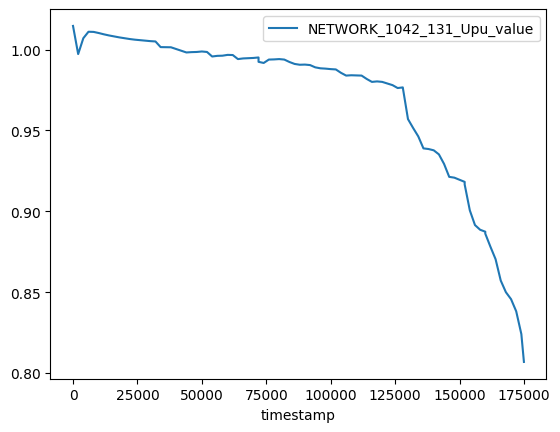

In [7]:
res.curves().plot()
plt.show()

## 4 - Second simulation with tap changer blocking automation system

In [8]:
tcb_df = pd.DataFrame.from_records(
    index='dynamic_model_id',
    columns=['dynamic_model_id', 'parameter_set_id'],
    data=[('TCB', 'TCB')])
# Transformers
tfo_ids = ['Tr11-1011', 'Tr12-1012', 'Tr13-1013', 'Tr22-1022', 'Tr1-1041', 'Tr2-1042', 'Tr3-1043', 'Tr4-1044', 'Tr5-1045', 'Tr31-2031',
        'Tr32-2032', 'Tr41-4041', 'Tr42-4042', 'Tr43-4043', 'Tr46-4046', 'Tr47-4047', 'Tr51-4051', 'Tr61-4061', 'Tr62-4062', 'Tr63-4063'
        'Tr71-4071', 'Tr72-4072']
tfo_df = pd.DataFrame.from_records(
    index='dynamic_model_id',
    columns=['dynamic_model_id', 'transformer_id'],
    data={'dynamic_model_id': ['TCB' for tfo in tfo_ids],
        'transformer_id': tfo_ids})
# Measurement point
measurement1_df = pd.DataFrame.from_records(
    index='dynamic_model_id',
    columns=['dynamic_model_id', 'measurement_point_id'],
    data=[('TCB', '1042_131')])
model_mapping.add_tap_changer_blocking_automation_system(df=tcb_df,
                                                         tfo_df=tfo_df,
                                                         mp1_df=measurement1_df)

Run second simulation

In [9]:
variables_mapping.add_standard_model_final_state_values('1042_131', 'Upu_value')
res = sim.run(network, model_mapping, event_mapping, variables_mapping, 0, 175, report_node)

Display final state values 

In [11]:
print(res.final_state_values())

                            values
variables                         
NETWORK_1042_131_Upu_value  0.8069
